In [28]:
## Let's try to figure out who the shortest, heaviest baseball players are.

In [29]:
import pybaseball as pb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [30]:
df = pd.read_csv("lahman/core/people.csv")

In [31]:
df.columns # We don't care about these.

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [81]:
df_simple = df.drop(
    columns=[
        "playerID",
        "birthYear",
        "birthMonth",
        "birthDay",
        "birthCountry",
        "birthState",
        "birthCity",
        "deathYear",
        "deathMonth",
        "deathDay",
        "deathCountry",
        "deathState",
        "deathCity",
        "nameFirst",
        "retroID",
        "bbrefID",
    ]
)

In [75]:
df_simple['kg'] = df_simple['weight'] * 0.453592
df_simple['meters'] = df_simple['height'] * 0.0254

In [76]:
df_simple['BMI'] = df_simple['kg'] / df_simple['meters'] ** 2

In [77]:
df_simple = df_simple.drop(
    columns=[
        "kg", "meters"
    ]
)

In [78]:
df_simple.head()

,playerID,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,BMI
0,aardsda01,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,2015-08-23,26.872860
1,aaronha01,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,24.412118
2,aaronto01,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,23.748109
3,aasedo01,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,23.748109
4,abadan01,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,24.275605


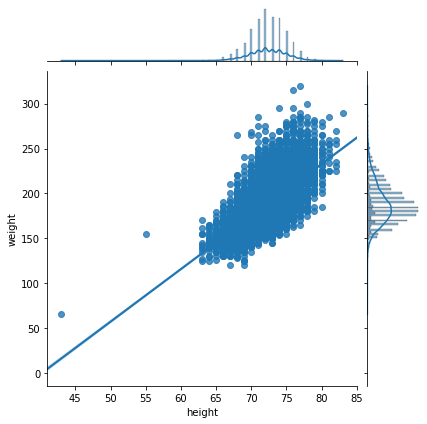

In [38]:
sns.jointplot(data=df_simple, x="height", y="weight", kind = "reg", truncate = False)

In [62]:
sns.choose_diverging_palette()

interactive(children=(IntSlider(value=220, description='h_neg', max=359), IntSlider(value=10, description='h_p…

[(0.2519971417644415, 0.4987337088076726, 0.5751602783606602),
 (0.43156001218774975, 0.6160490836499025, 0.6735874169971766),
 (0.611122882611058, 0.7333644584921324, 0.7720145556336929),
 (0.7906857530343663, 0.8506798333343624, 0.8704416942702093),
 (0.95, 0.95, 0.95),
 (0.9282549678814984, 0.7863704363662967, 0.7963965173228867),
 (0.9022582584936525, 0.6005186021022944, 0.622400049291663),
 (0.8762615491058064, 0.4146667678382919, 0.44840358126043944),
 (0.8510408608937171, 0.23436274952246883, 0.2796010376480583)]

<AxesSubplot:>

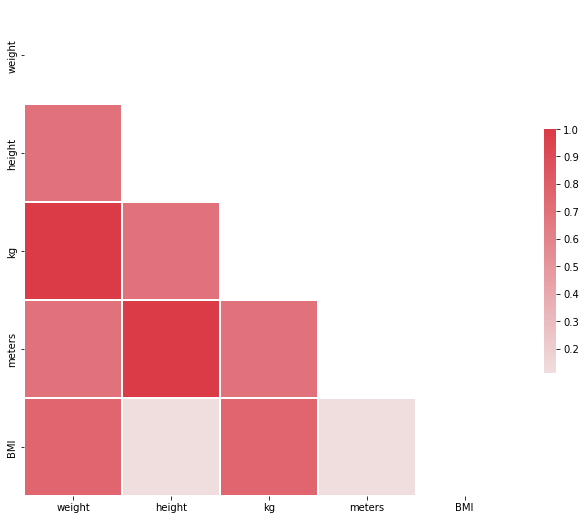

In [69]:

# Compute the correlation matrix
corr = df_simple.corr(method="spearman")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(290, 10, n=40, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    center=0,
    square=True,
    linewidths=0.25,
    cbar_kws={"shrink": .5},
)



In [83]:
corr_mat = df.corr().stack().reset_index(name="correlation")

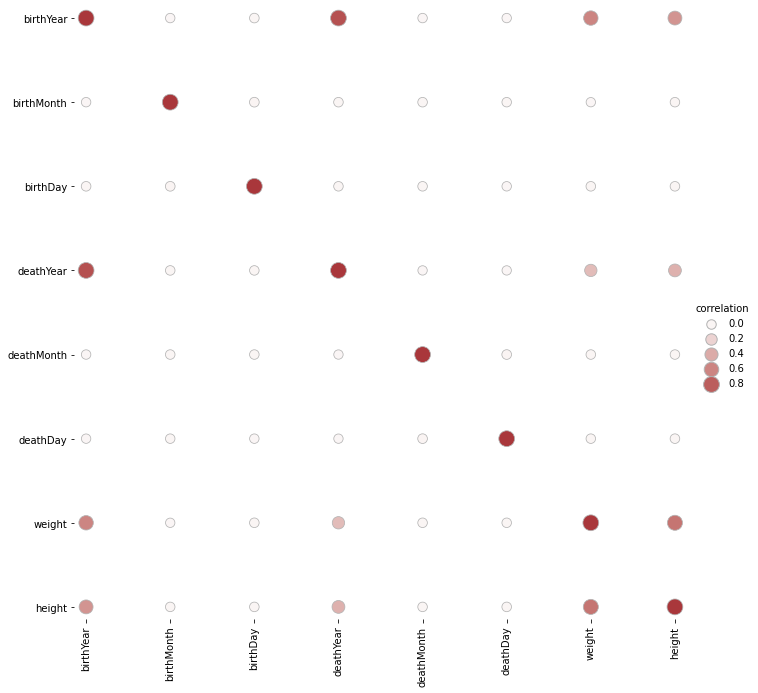

In [86]:
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")